In [1]:
import pandas as pd
from urllib.request import urlopen
import numpy as np
from collections import Counter
from sklearn import preprocessing
import matplotlib as plt
from scipy import stats
import plotly.offline as pyo
import plotly.graph_objs as go
from wordcloud import WordCloud, ImageColorGenerator
from xmltodict import parse
import plotly.express as px
import  matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from datetime import date
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('listings.csv')
df2 = df
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17629440,https://www.airbnb.com/rooms/17629440,20220911230914,2022-09-12,city scrape,ISOLA DEL CUORE,Stanchi da un viaggio in aereo 2 minuti e sent...,Tranquillità immersa nel verde con due laghi m...,https://a0.muscache.com/pictures/68d7eb8c-e5b6...,68534156,...,4.85,4.65,4.80,NaN,f,2,0,2,0,3.22
1,2737,https://www.airbnb.com/rooms/2737,20220911230914,2022-09-12,city scrape,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,...,5.00,4.40,4.40,NaN,f,6,0,6,0,0.07
2,103870,https://www.airbnb.com/rooms/103870,20220911230914,2022-09-12,city scrape,CASACHICA Your holiday home in Rome,<b>The space</b><br />The cosy and central Apa...,NaN,https://a0.muscache.com/pictures/2848355/49282...,535822,...,4.53,4.40,4.20,NaN,t,1,1,0,0,1.64
3,2903,https://www.airbnb.com/rooms/2903,20220911230914,2022-09-12,city scrape,Stay a night in Calisto6 B&B Rome,<b>The space</b><br />Calisto6 B&B is an Itali...,NaN,https://a0.muscache.com/pictures/6315103/3f4d3...,3280,...,4.70,4.74,4.48,NaN,f,3,0,3,0,0.33
4,104339,https://www.airbnb.com/rooms/104339,20220911230914,2022-09-12,previous scrape,Colorful apartment close MetroB,"Delightful, bright and colorful apartment for ...","Il quartiere ""San Paolo"" è parte integrante de...",https://a0.muscache.com/pictures/739258/4146f6...,543054,...,5.00,4.83,4.83,NaN,f,3,1,2,0,0.05


We detected too many nan values ​​in the host_response_rate column. However, we created another dataframe because it is a feature we still want to use.


In [3]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

## Data Cleaning

In [4]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.width", 100)
pd.set_option("expand_frame_repr", True)

We create a separate data for host_response rate.


In [5]:
df2 = df[["id","host_since","host_response_rate","host_id","host_identity_verified","host_is_superhost","latitude","longitude","room_type","bedrooms","beds","amenities","minimum_nights","neighbourhood_cleansed","price","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"]]

We clean the data by removing the columns we will use.


In [6]:
df = df[["id","host_since","host_id","host_identity_verified","host_is_superhost","latitude","longitude","room_type","bedrooms","beds","amenities","minimum_nights","neighbourhood_cleansed","price","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"]]
df

,id,host_since,host_id,host_identity_verified,host_is_superhost,latitude,longitude,room_type,bedrooms,beds,amenities,minimum_nights,neighbourhood_cleansed,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,17629440,2016-04-23,68534156,t,t,41.78984,12.60899,Private room,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""Hot water kettle"", ""Hangers"", ""Lock on bedroom door...",1,VII San Giovanni/Cinecittà,$45.00,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,3.22
1,2737,2008-09-18,3047,f,f,41.87136,12.48215,Private room,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi"", ""Hair dryer"", ""Long term stays allowed"", ""Dryer...",7,VIII Appia Antica,$50.00,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,0.07
2,103870,2011-04-26,535822,t,f,41.89711,12.50423,Entire home/apt,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Microwave"", ""Shampoo"", ""Coffee maker"", ""Hot water ke...",3,I Centro Storico,$78.00,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,1.64
3,2903,2008-09-28,3280,f,f,41.88824,12.46953,Private room,1.0,2.0,"[""Air conditioning"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Wifi"", ""Hair dryer"", ""TV""...",1,I Centro Storico,$164.00,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,0.33
4,104339,2011-04-28,543054,t,f,41.85585,12.48361,Entire home/apt,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Microwave"", ""Shampoo"", ""Cof...",2,VIII Appia Antica,$80.00,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24777,28042301,2018-08-26,211821938,t,f,41.64897,12.43349,Entire home/apt,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Heating"", ""Dishes and silverware"", ""Oven"", ""Hair dryer"", ""TV"", ""F...",2,X Ostia/Acilia,$55.00,17,4.53,4.76,4.88,4.94,4.88,4.82,4.65,0.35
24778,41256298,2019-04-03,252978577,t,f,41.79978,12.30112,Entire home/apt,1.0,1.0,"[""Private entrance"", ""Hot water"", ""Air conditioning"", ""Heating"", ""Wifi"", ""Hair dryer"", ""TV"", ""Br...",1,X Ostia/Acilia,$120.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.04
24779,15476977,2016-09-19,95809238,f,f,41.79590,12.29634,Private room,1.0,2.0,"[""Dedicated workspace"", ""Air conditioning"", ""Smart lock"", ""Heating"", ""Elevator"", ""Wifi"", ""TV"", ""...",1,X Ostia/Acilia,$165.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24780,42446790,2012-04-24,2214620,t,f,42.10042,12.38471,Private room,4.0,4.0,"[""Private entrance"", ""Hot water"", ""Air conditioning"", ""Heating"", ""Fire extinguisher"", ""Hair drye...",1,XV Cassia/Flaminia,$50.00,3,4.33,4.33,4.67,4.67,5.00,4.33,4.67,0.12


In [7]:
df.dropna(inplace=True)
df

,id,host_since,host_id,host_identity_verified,host_is_superhost,latitude,longitude,room_type,bedrooms,beds,amenities,minimum_nights,neighbourhood_cleansed,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,17629440,2016-04-23,68534156,t,t,41.78984,12.60899,Private room,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""Hot water kettle"", ""Hangers"", ""Lock on bedroom door...",1,VII San Giovanni/Cinecittà,$45.00,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,3.22
1,2737,2008-09-18,3047,f,f,41.87136,12.48215,Private room,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi"", ""Hair dryer"", ""Long term stays allowed"", ""Dryer...",7,VIII Appia Antica,$50.00,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,0.07
2,103870,2011-04-26,535822,t,f,41.89711,12.50423,Entire home/apt,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Microwave"", ""Shampoo"", ""Coffee maker"", ""Hot water ke...",3,I Centro Storico,$78.00,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,1.64
3,2903,2008-09-28,3280,f,f,41.88824,12.46953,Private room,1.0,2.0,"[""Air conditioning"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Wifi"", ""Hair dryer"", ""TV""...",1,I Centro Storico,$164.00,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,0.33
4,104339,2011-04-28,543054,t,f,41.85585,12.48361,Entire home/apt,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Microwave"", ""Shampoo"", ""Cof...",2,VIII Appia Antica,$80.00,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24776,22538683,2018-01-03,165551807,t,t,41.72610,12.61941,Entire home/apt,3.0,4.0,"[""Private entrance"", ""Hot water"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Wifi"", ""Hair...",3,IX Eur,$96.00,20,4.85,5.00,5.00,4.95,4.85,4.70,4.75,0.38
24777,28042301,2018-08-26,211821938,t,f,41.64897,12.43349,Entire home/apt,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Heating"", ""Dishes and silverware"", ""Oven"", ""Hair dryer"", ""TV"", ""F...",2,X Ostia/Acilia,$55.00,17,4.53,4.76,4.88,4.94,4.88,4.82,4.65,0.35
24778,41256298,2019-04-03,252978577,t,f,41.79978,12.30112,Entire home/apt,1.0,1.0,"[""Private entrance"", ""Hot water"", ""Air conditioning"", ""Heating"", ""Wifi"", ""Hair dryer"", ""TV"", ""Br...",1,X Ostia/Acilia,$120.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.04
24780,42446790,2012-04-24,2214620,t,f,42.10042,12.38471,Private room,4.0,4.0,"[""Private entrance"", ""Hot water"", ""Air conditioning"", ""Heating"", ""Fire extinguisher"", ""Hair drye...",1,XV Cassia/Flaminia,$50.00,3,4.33,4.33,4.67,4.67,5.00,4.33,4.67,0.12


We are doing research to determine if encode is required.


In [8]:
df.dtypes

id                               int64
host_since                      object
host_id                          int64
host_identity_verified          object
host_is_superhost               object
latitude                       float64
longitude                      float64
room_type                       object
bedrooms                       float64
beds                           float64
amenities                       object
minimum_nights                   int64
neighbourhood_cleansed          object
price                           object
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

Encoding

In [9]:
df['price'].unique()

array(['$45.00', '$50.00', '$78.00', '$164.00', '$80.00', '$90.00',
       '$100.00', '$75.00', '$40.00', '$70.00', '$34.00', '$101.00',
       '$103.00', '$210.00', '$49.00', '$130.00', '$180.00', '$194.00',
       '$146.00', '$115.00', '$173.00', '$95.00', '$44.00', '$20.00',
       '$225.00', '$73.00', '$529.00', '$218.00', '$117.00', '$104.00',
       '$65.00', '$59.00', '$196.00', '$120.00', '$110.00', '$113.00',
       '$83.00', '$26.00', '$72.00', '$67.00', '$150.00', '$85.00',
       '$107.00', '$74.00', '$140.00', '$54.00', '$111.00', '$87.00',
       '$98.00', '$60.00', '$37.00', '$203.00', '$112.00', '$522.00',
       '$1,182.00', '$964.00', '$307.00', '$102.00', '$39.00', '$89.00',
       '$160.00', '$161.00', '$200.00', '$118.00', '$30.00', '$63.00',
       '$58.00', '$181.00', '$88.00', '$133.00', '$108.00', '$57.00',
       '$171.00', '$96.00', '$217.00', '$19.00', '$99.00', '$31.00',
       '$53.00', '$153.00', '$79.00', '$36.00', '$347.00', '$645.00',
       '$105.00',

## Encoding

Encoding Price

In [10]:
df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''))

/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_9774/1429369164.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



We do a separate encoding for the host response rate. Unlike our main dataframe


In [11]:
df2['host_response_rate']

0        100%
1         99%
2        100%
3         56%
4         NaN
         ... 
24777     NaN
24778     58%
24779     50%
24780    100%
24781    100%
Name: host_response_rate, Length: 24782, dtype: object

In [12]:
df2.dropna(inplace=True)

In [13]:
df2['host_response_rate'] = df2['host_response_rate'].str.rstrip('%').astype(float)
df2['host_response_rate']

0        100.0
1         99.0
2        100.0
3         56.0
5         96.0
         ...  
24775    100.0
24776    100.0
24778     58.0
24780    100.0
24781    100.0
Name: host_response_rate, Length: 17851, dtype: float64

We are encoding for our main dataframe again


In [14]:
df['price']

0         45.0
1         50.0
2         78.0
3        164.0
4         80.0
         ...  
24776     96.0
24777     55.0
24778    120.0
24780     50.0
24781     40.0
Name: price, Length: 20159, dtype: float64

Encoding Superhost Value

In [15]:
df['host_is_superhost'] = df['host_is_superhost'].replace({'t': 1, 'f': 0})

Encoding Verified Account Value

In [16]:
df['host_identity_verified'] = df['host_identity_verified'].replace({'t': 1, 'f': 0})

Encoding Host Since Information

In [17]:
df['host_since'] = pd.to_datetime(df['host_since'])

In [18]:
df.dtypes

id                                      int64
host_since                     datetime64[ns]
host_id                                 int64
host_identity_verified                  int64
host_is_superhost                       int64
latitude                              float64
longitude                             float64
room_type                              object
bedrooms                              float64
beds                                  float64
amenities                              object
minimum_nights                          int64
neighbourhood_cleansed                 object
price                                 float64
number_of_reviews                       int64
review_scores_rating                  float64
review_scores_accuracy                float64
review_scores_cleanliness             float64
review_scores_checkin                 float64
review_scores_communication           float64
review_scores_location                float64
review_scores_value               

Encoding completed


In [19]:
df.describe()

,id,host_id,host_identity_verified,host_is_superhost,latitude,longitude,bedrooms,beds,minimum_nights,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,2.015900e+04,2.015900e+04,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000
mean,7.419502e+16,1.136732e+08,0.887147,0.296939,41.891261,12.479298,1.487127,2.287266,3.267970,154.059045,58.496602,4.698620,4.756131,4.729032,4.829514,4.819874,4.739638,4.666552,1.442857
std,2.021429e+17,1.318540e+08,0.316421,0.456921,0.039601,0.052586,0.861601,1.599829,18.132198,692.644269,83.587567,0.401241,0.395091,0.391525,0.335229,0.360113,0.365266,0.401955,1.520126
min,2.737000e+03,1.822000e+03,0.000000,0.000000,41.646040,12.221320,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.181447e+07,1.355930e+07,1.000000,0.000000,41.886395,12.461929,1.000000,1.000000,1.000000,70.000000,6.000000,4.600000,4.700000,4.650000,4.800000,4.800000,4.630000,4.580000,0.310000
50%,2.757075e+07,5.000110e+07,1.000000,0.000000,41.896400,12.477430,1.000000,2.000000,2.000000,103.000000,24.000000,4.800000,4.860000,4.840000,4.920000,4.930000,4.850000,4.760000,0.960000
75%,4.566598e+07,1.864458e+08,1.000000,1.000000,41.905679,12.502820,2.000000,3.000000,3.000000,161.000000,75.000000,4.940000,4.970000,4.970000,5.000000,5.000000,4.980000,4.880000,2.090000
max,7.100789e+17,4.778250e+08,1.000000,1.000000,42.148796,12.830400,21.000000,28.000000,1000.000000,90963.000000,1120.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,33.530000


## Data Analysis

In [20]:
top_host_id = df['host_id'].value_counts().head(10)
top_host_id

23532561     193
96122546     117
8973851       55
63191555      54
224869116     45
316068        43
2405376       38
1107433       35
1764914       35
1369759       34
Name: host_id, dtype: int64

We screen the top-listing hosts to see if there are multiple homeowners, and how many.

[Text(0, 0, '23532561'),
 Text(1, 0, '96122546'),
 Text(2, 0, '8973851'),
 Text(3, 0, '63191555'),
 Text(4, 0, '224869116'),
 Text(5, 0, '316068'),
 Text(6, 0, '2405376'),
 Text(7, 0, '1107433'),
 Text(8, 0, '1764914'),
 Text(9, 0, '1369759')]

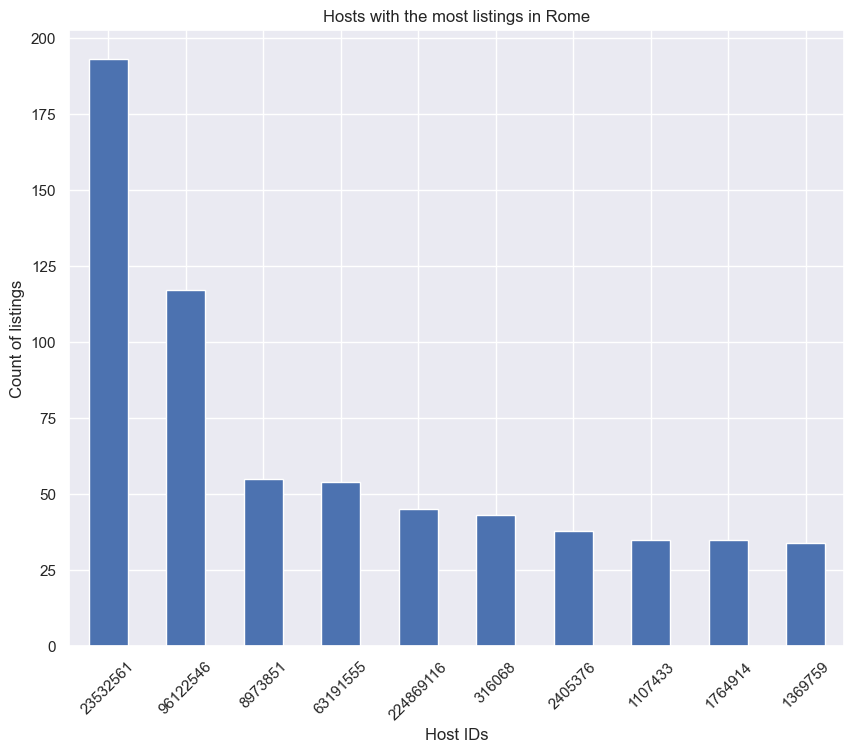

In [21]:
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = top_host_id.plot(kind='bar')
viz_bar.set_title('Hosts with the most listings in Rome')
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)

We take a look at the breakdown of the type of house rented.


Text(0.5, 1.0, 'Distribution of Room Type')

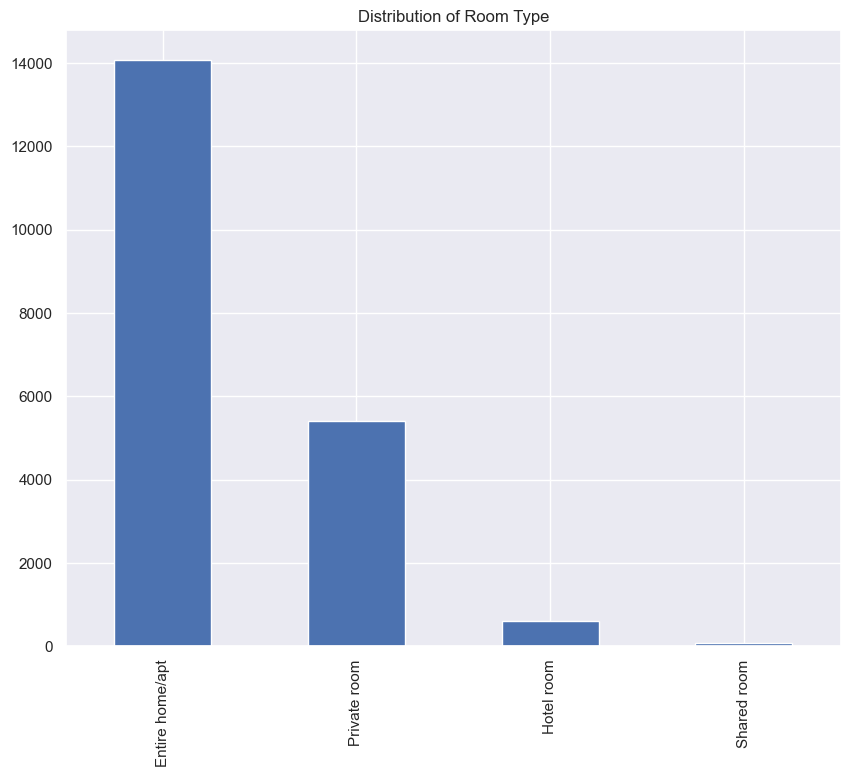

In [22]:
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = df.room_type.value_counts().plot(kind='bar')
viz_bar.set_title('Distribution of Room Type')

There are more cases where the whole house is rented. Customers prefer to own the whole house alone

Distribution of Superhost

In [23]:
df1=df

Text(0.5, 1.0, 'Distribution of Superhost')

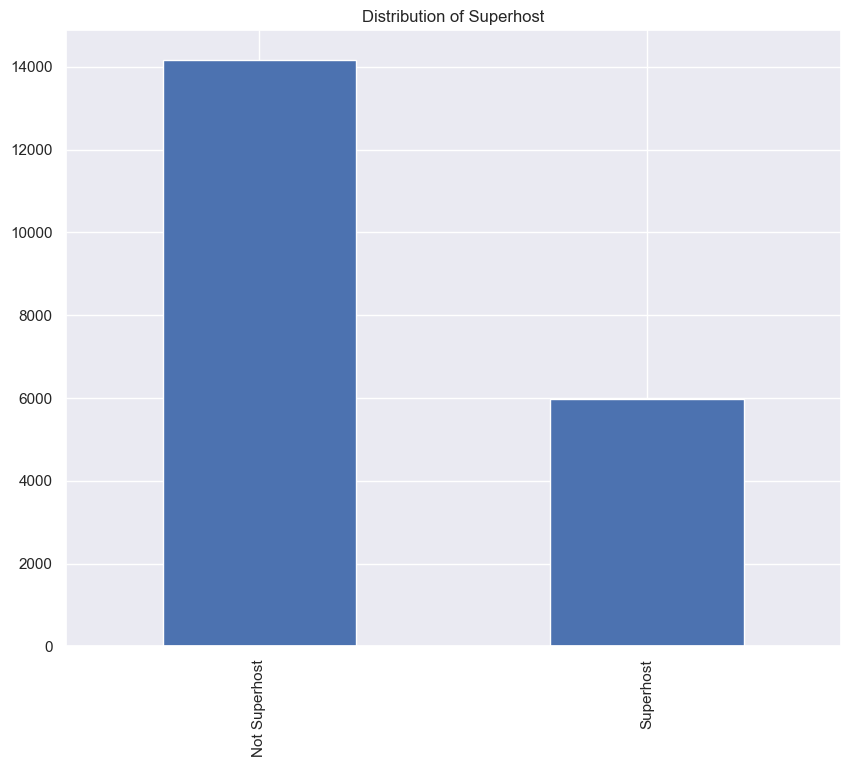

In [24]:
df1['host_is_superhost'] = df['host_is_superhost'].replace({1: 'Superhost', 0: 'Not Superhost'})
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = df1.host_is_superhost.value_counts().plot(kind='bar')
viz_bar.set_title('Distribution of Superhost')


Most hosts are not superhosts


Distribution of Verified Account

Text(0.5, 1.0, 'Distribution of Verified Account')

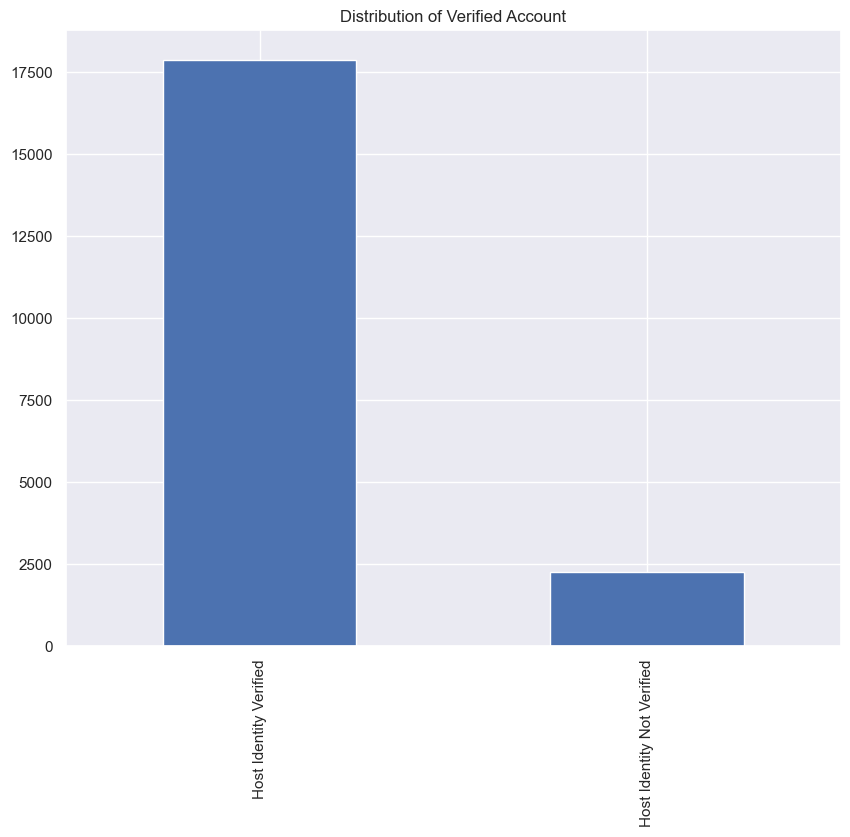

In [25]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({1: 'Host Identity Verified', 0: 'Host Identity Not Verified'})
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = df1.host_identity_verified.value_counts().plot(kind='bar')
viz_bar.set_title('Distribution of Verified Account')

Most hosts are verified account.

Let's learn the regions of the city of Rome and show them where they are on the map


In [26]:
df['neighbourhood_cleansed'].unique()

array(['VII San Giovanni/Cinecittà', 'VIII Appia Antica',
       'I Centro Storico', 'II Parioli/Nomentano', 'XIV Monte Mario',
       'V Prenestino/Centocelle', 'IV Tiburtina', 'XIII Aurelia',
       'XII Monte Verde', 'IX Eur', 'X Ostia/Acilia',
       'XV Cassia/Flaminia', 'VI Roma delle Torri', 'III Monte Sacro',
       'XI Arvalia/Portuense'], dtype=object)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

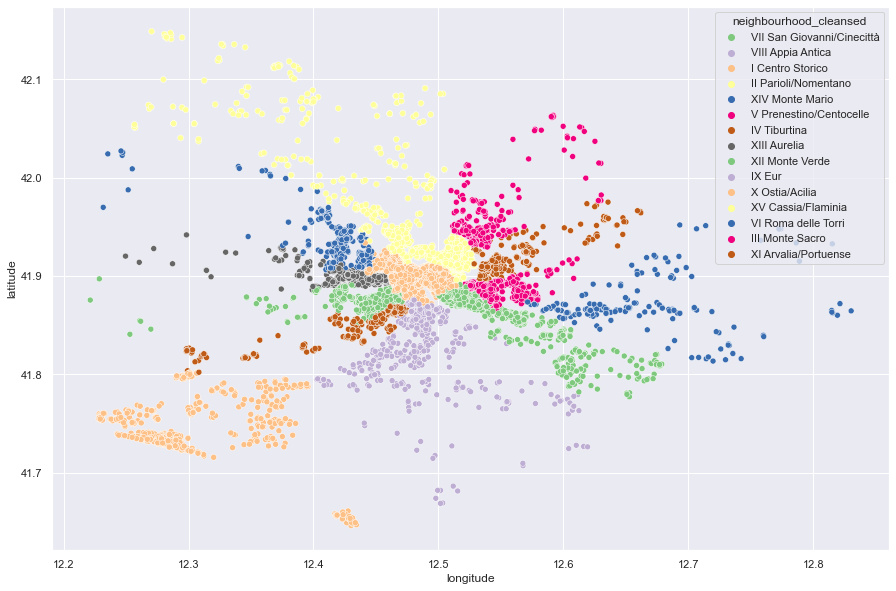

In [28]:
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_cleansed', palette='Accent')

In which region there are more houses, let's look at their distribution

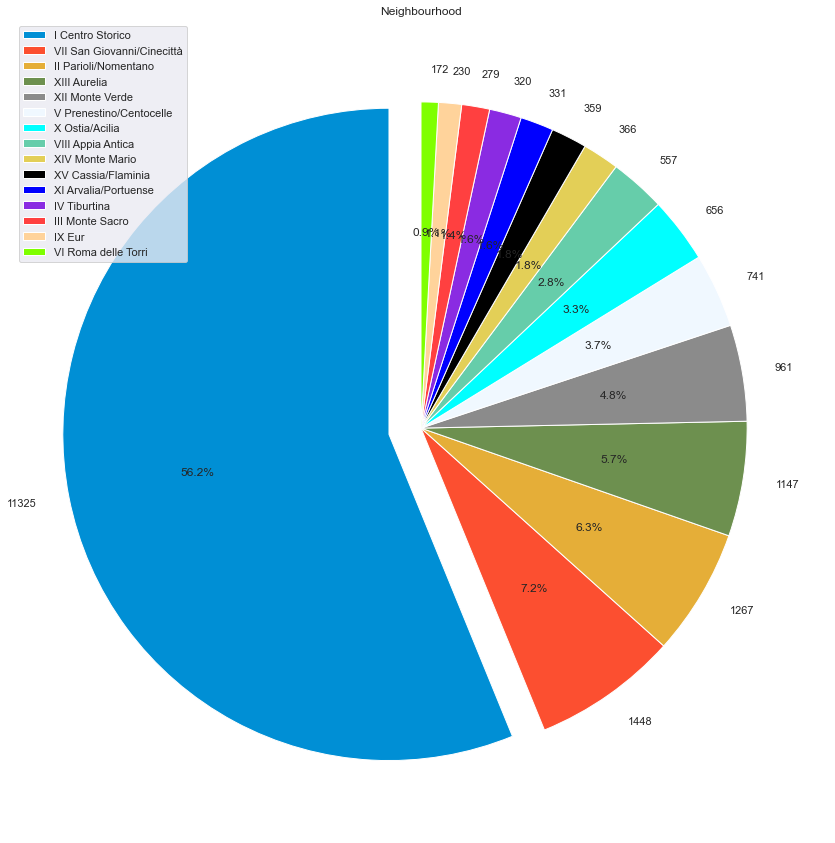

In [29]:
labels = df.neighbourhood_cleansed.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b','#F0F8FF','#00FFFF','#66CDAA','#E3CF57','#000000','#0000FF','#8A2BE2','#FF4040','#FFD39B','#7FFF00']
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
shape = df.neighbourhood_cleansed.value_counts().values
plt.figure(figsize=(15,15))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood')
plt.show()

More than half of the houses in Rome belong to the I Centro Storico. It is possible to say that customers are more intense in this region.


The minimum number of days rented by the houses in this area


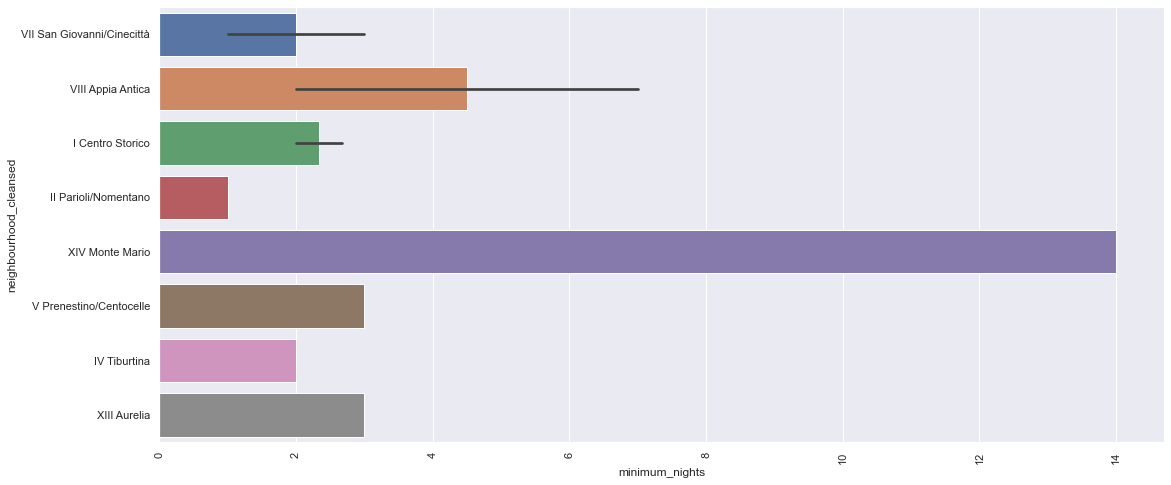

In [30]:
plt.figure(figsize=(18,8))
sns.barplot(x=df.minimum_nights[:25], y=df.neighbourhood_cleansed[:25]) 
plt.xticks(rotation=90)
plt.show()

Distribution of Room Type in Neighbourhood of Rome


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

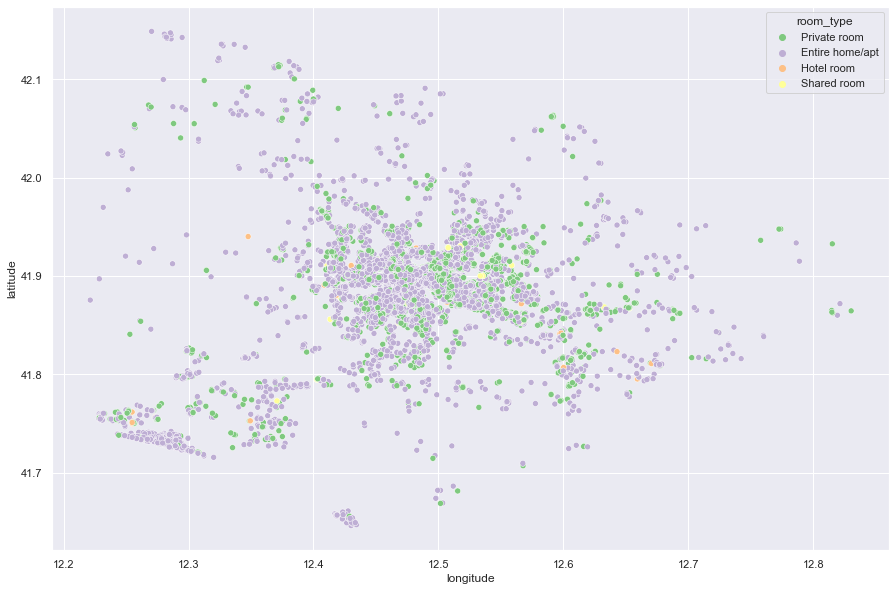

In [31]:
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type', palette='Accent')

Ratio of Room Type in Neighbourhood of Rome

In [32]:
import plotly.io as pio

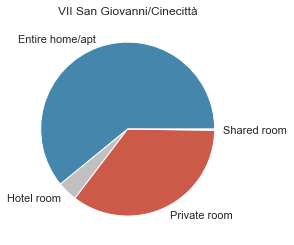

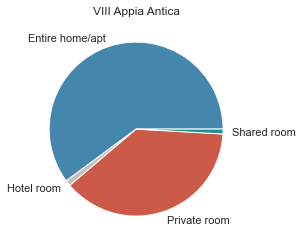

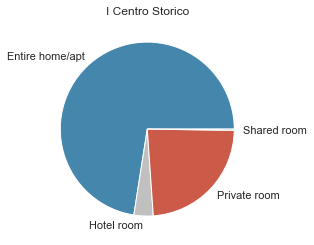

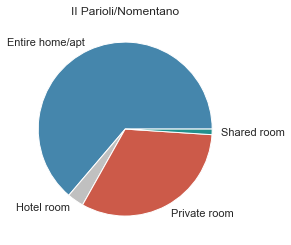

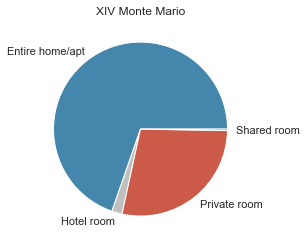

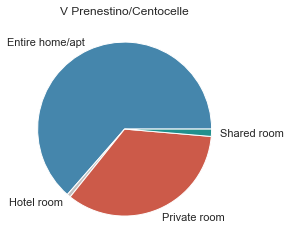

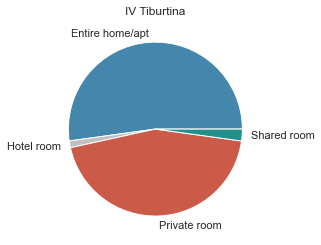

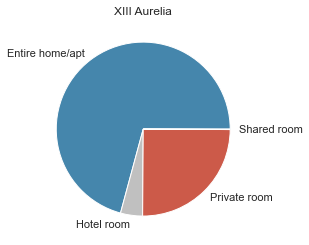

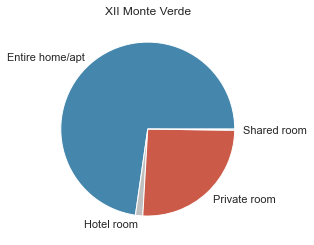

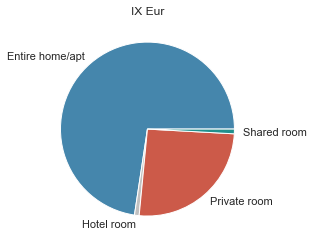

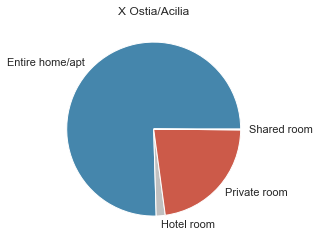

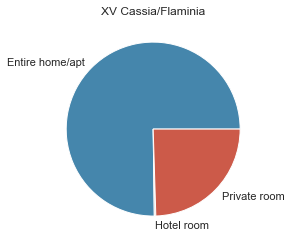

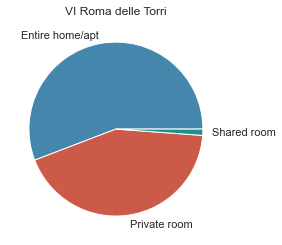

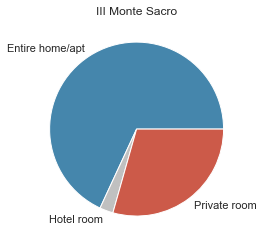

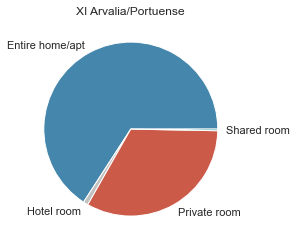

In [33]:
color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#21908d', 'Hotel room' : '#C0C0C0' }
airbnb_types = df.groupby(['neighbourhood_cleansed', 'room_type']).size()

for region in df.neighbourhood_cleansed.unique():
    airbnb_reg = airbnb_types[region]
    labels = airbnb_reg.index
    sizes = airbnb_reg.values
    colors = [color_dict[x] for x in labels]
    plt.figure(figsize=(10,4))
    plt.pie(sizes, labels=labels, colors=colors)
    plt.title(region)
    plt.show()

Distribution of under 500$ Price each neighbourhood

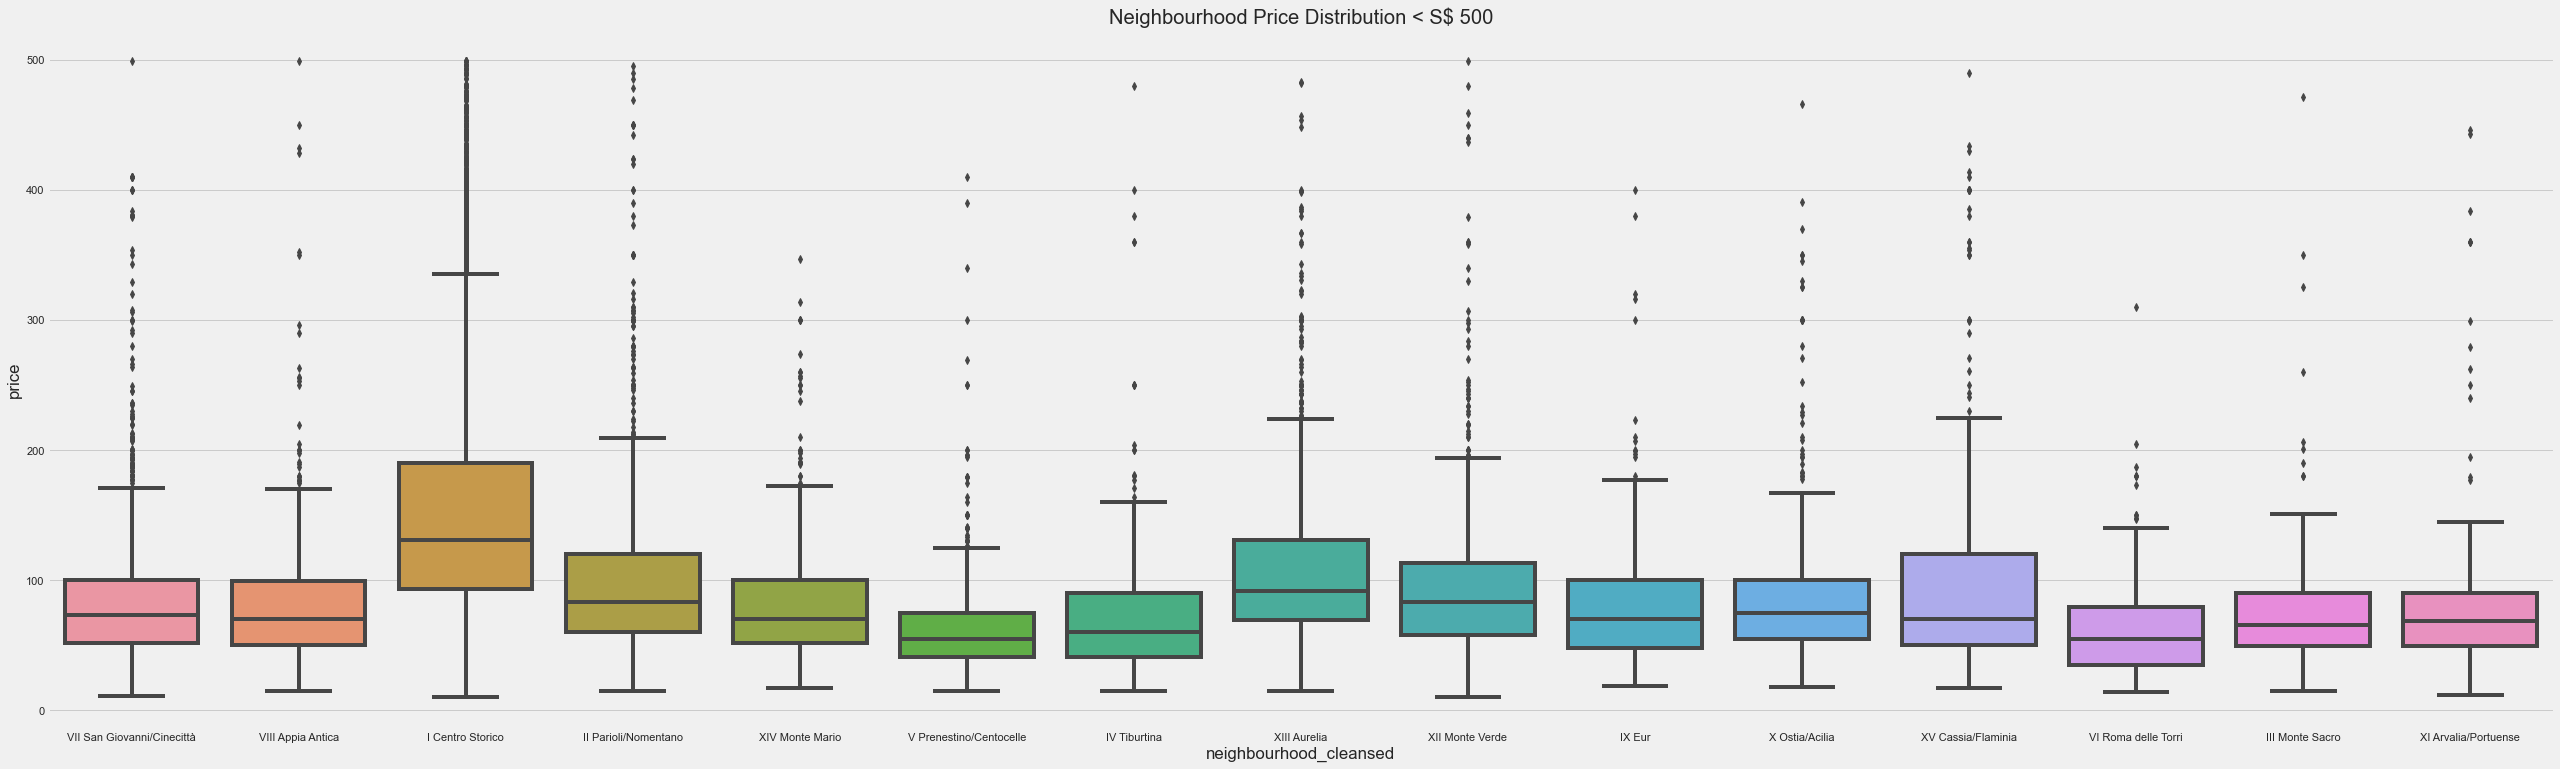

In [34]:
df1 = df[df.price < 500]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(40,12))
sns.boxplot(y='price',x='neighbourhood_cleansed',data = df1)
plt.title('Neighbourhood Price Distribution < S$ 500')
plt.show()

In [35]:
df_n_roomtype = df.groupby(['neighbourhood_cleansed','room_type']).agg({'price':'sum'})
df_n_roomtype.head(10)

price
neighbourhood_cleansed room_type                  
I Centro Storico       Entire home/apt  1688393.29
                       Hotel room         66919.00
                       Private room      339191.00
                       Shared room         1493.00
II Parioli/Nomentano   Entire home/apt   112382.00
                       Hotel room          4038.00
                       Private room       47004.00
                       Shared room          641.00
III Monte Sacro        Entire home/apt    16668.00
                       Hotel room           610.00

In [36]:
df_n_roomtype = pd.pivot_table(df_n_roomtype, values='price', index=['neighbourhood_cleansed'], columns=['room_type'])

Max win in Private Room


In [37]:
print(df_n_roomtype.sort_values('Private room', ascending = False).head(1))
print(df_n_roomtype.sort_values('Private room', ascending = True).head(1))

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
I Centro Storico             1688393.29     66919.0      339191.0       1493.0
room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
IX Eur                          18590.0       160.0        3285.0         50.0


Max win in Entire home/apt


In [38]:
print(df_n_roomtype.sort_values('Entire home/apt', ascending = False).head(1))
print(df_n_roomtype.sort_values('Entire home/apt', ascending = True).head(1))

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
I Centro Storico             1688393.29     66919.0      339191.0       1493.0
room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
VI Roma delle Torri              9036.0         NaN        4314.0        125.0


Max win in Shared room


In [39]:
print(df_n_roomtype.sort_values('Shared room', ascending = False).head(1))
print(df_n_roomtype.sort_values('Shared room', ascending = True).head(1))

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
I Centro Storico             1688393.29     66919.0      339191.0       1493.0
room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
X Ostia/Acilia                  46781.0       706.0        9893.0         18.0


Max win in Hotel Room


In [40]:
print(df_n_roomtype.sort_values('Hotel room', ascending = False).head(1))
print(df_n_roomtype.sort_values('Hotel room', ascending = True).head(1))

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
I Centro Storico             1688393.29     66919.0      339191.0       1493.0
room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
XV Cassia/Flaminia              40736.0       106.0        6266.0          NaN


Distribution of number of beds

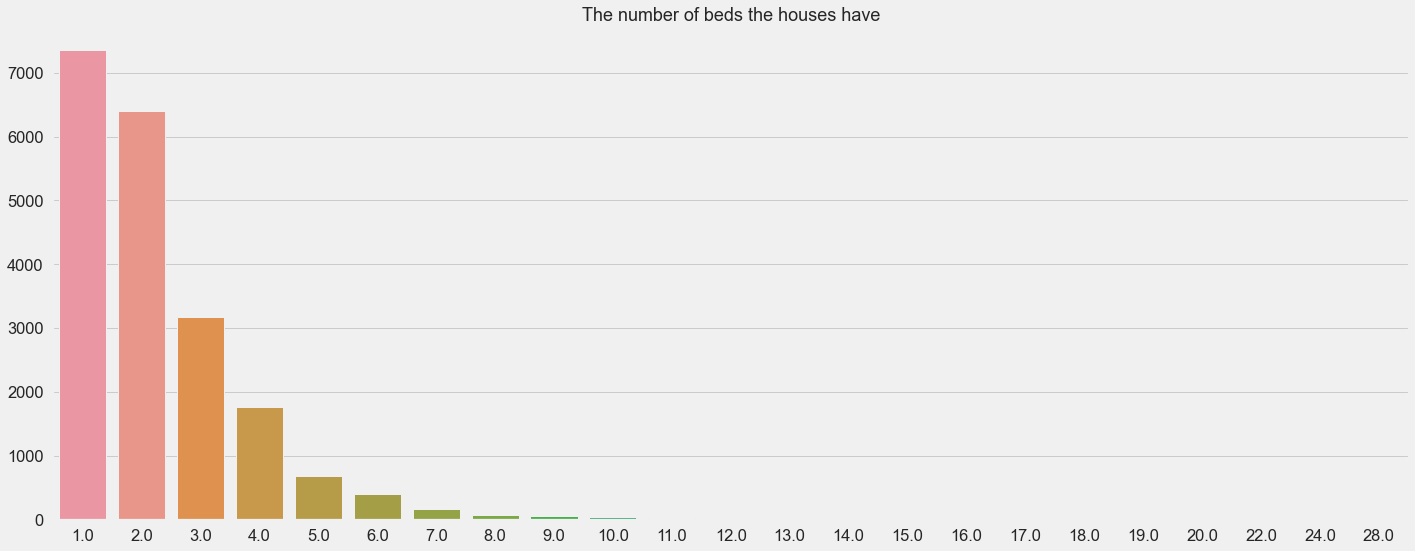

In [41]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.beds.value_counts().index,y=df.beds.value_counts().values)
plt.title("The number of beds the houses have")
plt.tight_layout()

Houses usually have 1 or 2 beds. It is possible to say that very large houses are not rented.


Distribution of number of bedrooms

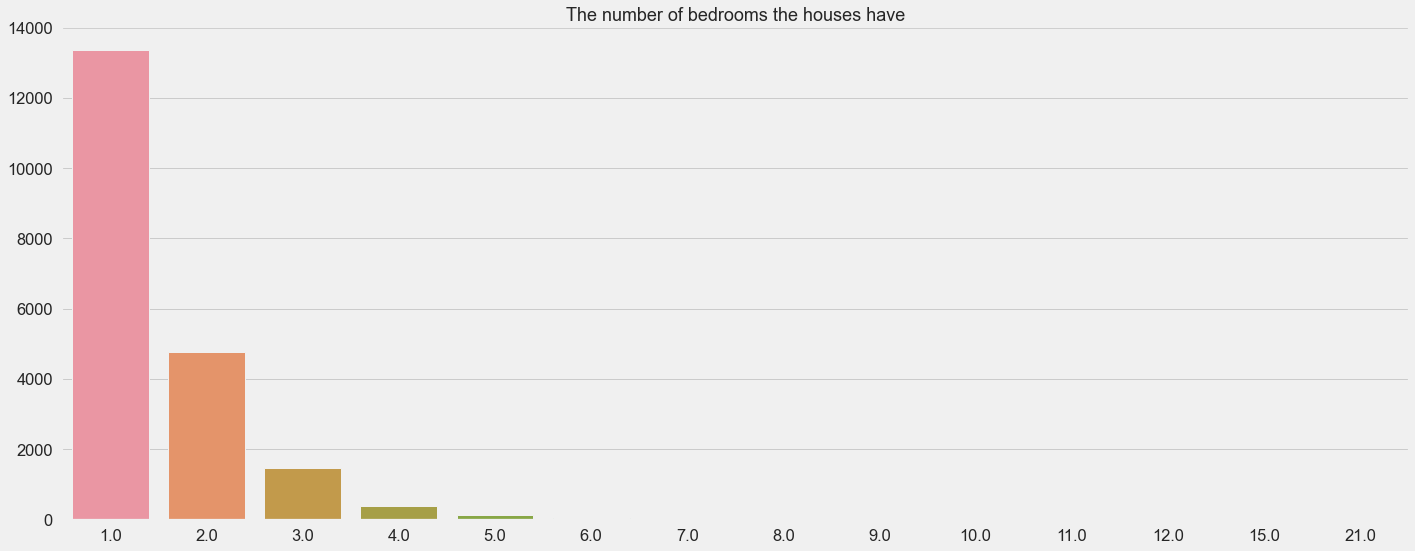

In [42]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.bedrooms.value_counts().index,y=df.bedrooms.value_counts().values)
plt.title("The number of bedrooms the houses have")
plt.tight_layout()

Houses usually have 1 or 2 bedrooms. It is possible to say that very large houses are not rented.


Top 10 homes with the most reviews


In [43]:
df.nlargest(10, 'number_of_reviews')

,id,host_since,host_id,host_identity_verified,host_is_superhost,latitude,longitude,room_type,bedrooms,beds,amenities,minimum_nights,neighbourhood_cleansed,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
13791,35636293,2014-08-14,20028020,Host Identity Verified,Superhost,41.900249,12.495944,Private room,1.0,1.0,"[""Luggage dropoff allowed"", ""42\"" HDTV with standard cable"", ""Coffee maker"", ""Shampoo"", ""Cleanin...",1,I Centro Storico,193.0,1120,4.82,4.85,4.91,4.91,4.89,4.90,4.81,33.53
1546,2399029,2014-02-15,12258559,Host Identity Verified,Not Superhost,41.894260,12.490240,Private room,1.0,2.0,"[""Private entrance"", ""Hot water"", ""AC - split type ductless system"", ""Heating"", ""Refrigerator"", ...",1,I Centro Storico,43.0,932,4.67,4.74,4.78,4.87,4.80,4.95,4.76,9.07
1741,2709785,2014-02-15,12258559,Host Identity Verified,Not Superhost,41.894360,12.490250,Private room,1.0,2.0,"[""Heating"", ""Luggage dropoff allowed"", ""Breakfast"", ""Shampoo"", ""Hangers"", ""Lock on bedroom door""...",1,I Centro Storico,38.0,854,4.70,4.77,4.81,4.90,4.80,4.94,4.75,8.34
577,747656,2012-10-20,3925580,Host Identity Verified,Superhost,41.892910,12.471450,Entire home/apt,1.0,1.0,"[""Air conditioning"", ""Heating"", ""Ethernet connection"", ""Breakfast"", ""Keurig coffee machine"", ""Mi...",2,I Centro Storico,89.0,774,4.85,4.85,4.88,4.94,4.93,4.94,4.83,6.44
853,865289,2012-10-15,3873669,Host Identity Verified,Not Superhost,41.895480,12.474850,Entire home/apt,1.0,1.0,"[""Heating"", ""Paid parking off premises"", ""Ethernet connection"", ""HDTV"", ""Coffee maker"", ""Shampoo...",2,I Centro Storico,72.0,773,4.20,4.26,4.28,4.72,4.71,4.93,4.31,6.61
1171,1385250,2013-07-10,7392775,Host Identity Verified,Superhost,41.889850,12.473460,Entire home/apt,1.0,1.0,"[""Air conditioning"", ""Heating"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Coffee ...",2,I Centro Storico,70.0,765,4.75,4.79,4.80,4.91,4.91,4.91,4.72,6.90
1145,1373696,2013-07-10,7392775,Host Identity Verified,Superhost,41.888370,12.474530,Entire home/apt,2.0,2.0,"[""Air conditioning"", ""Heating"", ""Paid parking off premises"", ""Ethernet connection"", ""Microwave"",...",2,I Centro Storico,100.0,749,4.89,4.94,4.93,4.96,4.96,4.93,4.87,6.75
1249,1262834,2013-06-12,6876317,Host Identity Verified,Superhost,41.890380,12.472890,Entire home/apt,1.0,1.0,"[""Bathroom essentials"", ""Air conditioning"", ""Children\u2019s dinnerware"", ""Heating"", ""Crib"", ""Ir...",1,I Centro Storico,75.0,747,4.78,4.79,4.69,4.87,4.82,4.93,4.75,6.74
739,825299,2012-10-20,3925580,Host Identity Verified,Superhost,41.895880,12.472890,Entire home/apt,1.0,1.0,"[""Air conditioning"", ""Heating"", ""Ethernet connection"", ""Breakfast"", ""Microwave"", ""Shampoo"", ""Cof...",2,I Centro Storico,93.0,735,4.91,4.92,4.90,4.95,4.95,4.94,4.90,6.31
503,470817,2012-05-10,2336397,Host Identity Verified,Not Superhost,41.895340,12.506250,Private room,1.0,1.0,"[""Elevator"", ""Essentials"", ""Heating"", ""Long term stays allowed""]",1,I Centro Storico,25.0,717,4.30,4.32,4.63,4.74,4.70,4.08,4.33,5.80


We have determined that the most commented places are in I Centro Storico, and it is remarkable that all of them have defined accounts.

Distribution of scores as back home


In [27]:
score_mean = df['review_scores_rating'].mean()
accuracy_mean = df['review_scores_accuracy'].mean()
cleanliness_mean = df['review_scores_cleanliness'].mean()
checkin_mean = df['review_scores_checkin'].mean()
communication_mean = df['review_scores_communication'].mean()
location_mean = df['review_scores_location'].mean()
value_mean = df['review_scores_value'].mean()

In [28]:
meanDict = {
    'Review Score Rating' : score_mean,
    'Review Scores Accuracy' : accuracy_mean,
    'Review Scores Cleanliness' : cleanliness_mean,
    'Review Scores Checkin' : checkin_mean,
    'Review Scores Communication' : communication_mean,
    'Review Scores Location' : location_mean,
    'Review Scores Value' : value_mean
}

keys = list(meanDict.keys())
values = list(meanDict.values())

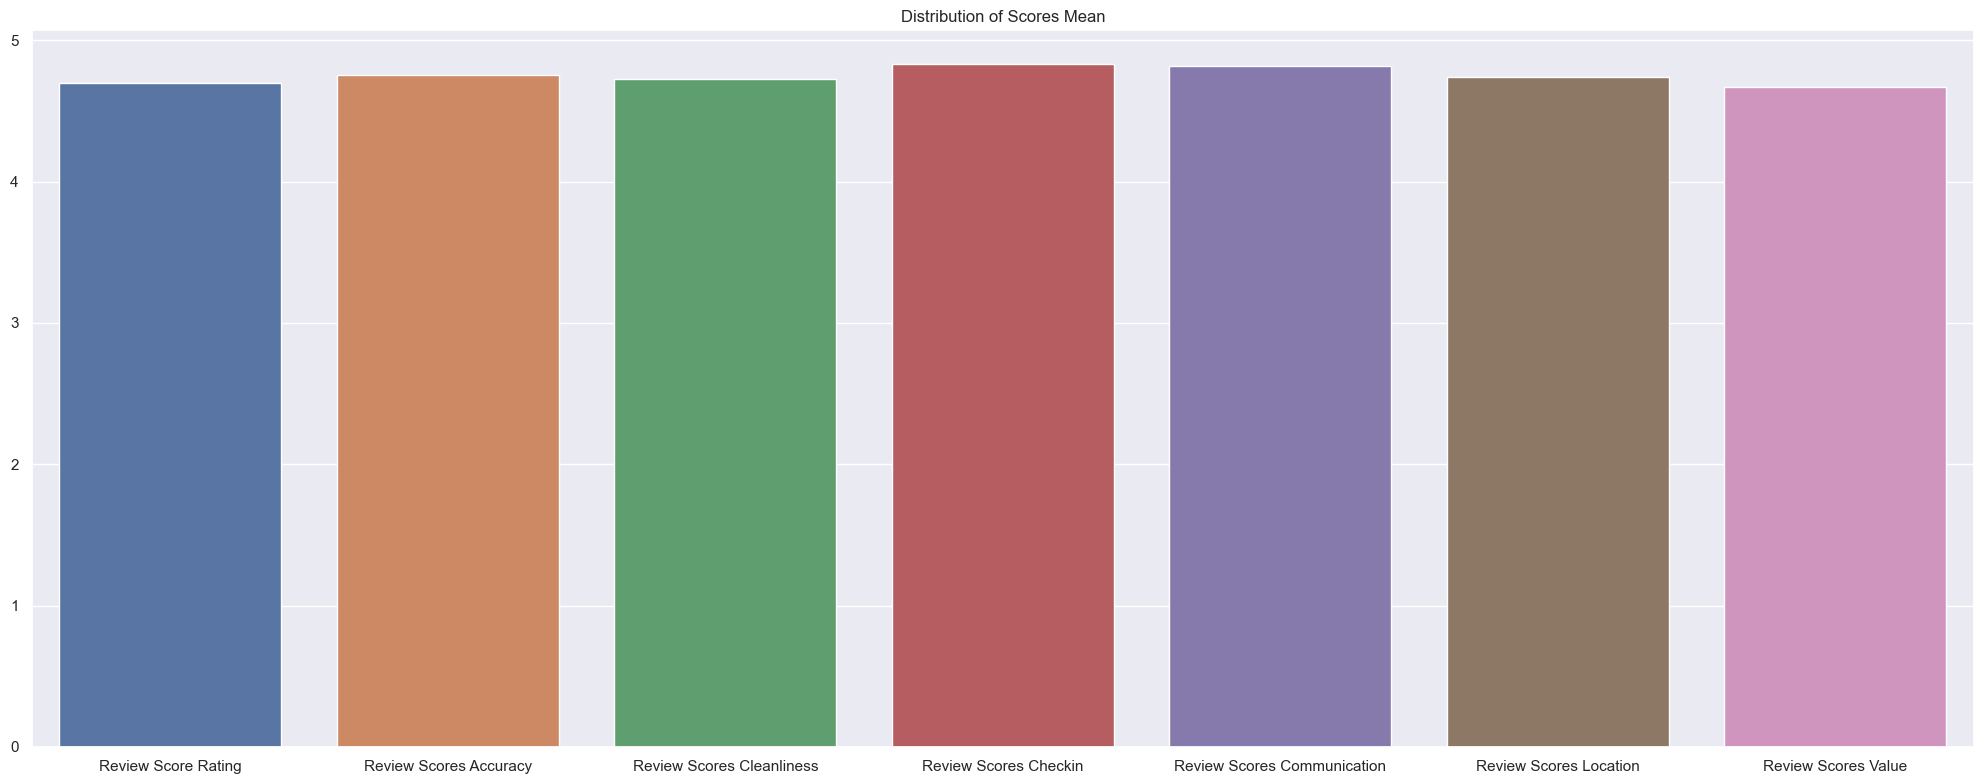

In [29]:
plt.figure(figsize=(20,8))
sns.barplot(x=keys,y=values)
plt.title("Distribution of Scores Mean")
plt.tight_layout()

In general, we can interpret the values ​​as 4.6-4.7 on average to get more than 4.7 values ​​to have a good home.


how the rate of returning to answers affects the score


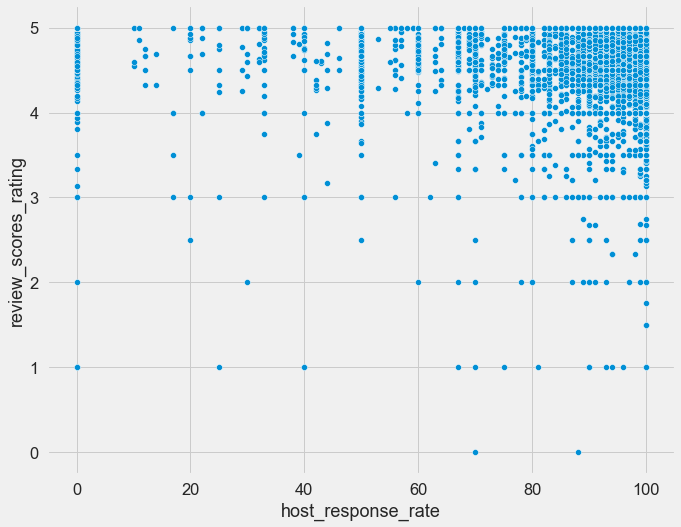

In [47]:
x1 = df2['host_response_rate']
y1= df2['review_scores_rating']
sns.scatterplot(data=df2, x=x1, y=y1)

plt.show()

From this chart, we can see the importance of the host's response rate to messages. The higher the response rate to messages, the higher the score given by users.


We observe that the higher the return rate, the higher the score.


In [30]:
amenities=[]
for amenity in df.amenities:
    amenities.append(amenity)

def split_name(i):
    s = str(i).split()
    return s

amenities_count = []
for n in amenities:
    for word in split_name(n):
        word = word.lower()
        amenities_count.append(word)

The words they describe as amenities to houses. Which words are used the most?


In [31]:
top_25 = Counter(amenities_count).most_common()
top_25 = top_25[:40]
top_25

[('and', 27079),
 ('allowed",', 23798),
 ('"hot', 19498),
 ('dryer",', 18676),
 ('"hair', 18632),
 ('"wifi",', 18410),
 ('"essentials",', 17921),
 ('term', 17752),
 ('stays', 17752),
 ('"long', 17717),
 ('"kitchen",', 15939),
 ('"hangers",', 15840),
 ('water",', 15729),
 ('"shampoo",', 14028),
 ('silverware",', 13961),
 ('"dishes', 13958),
 ('"refrigerator",', 13904),
 ('conditioning",', 13794),
 ('"free', 13732),
 ('"heating",', 13246),
 ('maker",', 13139),
 ('"cooking', 12837),
 ('basics",', 12818),
 ('"coffee', 12717),
 ('"tv",', 12342),
 ('linens",', 12238),
 ('"bed', 12225),
 ('alarm",', 11749),
 ('aid', 11545),
 ('kit",', 11545),
 ('"first', 11354),
 ('on', 11327),
 ('parking', 11017),
 ('"fire', 10744),
 ('premises",', 10723),
 ('extinguisher",', 10603),
 ('["air', 9583),
 ('"elevator",', 9345),
 ('"paid', 8867),
 ('"private', 8739)]

[Text(0, 0, 'and'),
 Text(1, 0, 'allowed",'),
 Text(2, 0, '"hot'),
 Text(3, 0, 'dryer",'),
 Text(4, 0, '"hair'),
 Text(5, 0, '"wifi",'),
 Text(6, 0, '"essentials",'),
 Text(7, 0, 'term'),
 Text(8, 0, 'stays'),
 Text(9, 0, '"long'),
 Text(10, 0, '"kitchen",'),
 Text(11, 0, '"hangers",'),
 Text(12, 0, 'water",'),
 Text(13, 0, '"shampoo",'),
 Text(14, 0, 'silverware",'),
 Text(15, 0, '"dishes'),
 Text(16, 0, '"refrigerator",'),
 Text(17, 0, 'conditioning",'),
 Text(18, 0, '"free'),
 Text(19, 0, '"heating",'),
 Text(20, 0, 'maker",'),
 Text(21, 0, '"cooking'),
 Text(22, 0, 'basics",'),
 Text(23, 0, '"coffee'),
 Text(24, 0, '"tv",'),
 Text(25, 0, 'linens",'),
 Text(26, 0, '"bed'),
 Text(27, 0, 'alarm",'),
 Text(28, 0, 'aid'),
 Text(29, 0, 'kit",'),
 Text(30, 0, '"first'),
 Text(31, 0, 'on'),
 Text(32, 0, 'parking'),
 Text(33, 0, '"fire'),
 Text(34, 0, 'premises",'),
 Text(35, 0, 'extinguisher",'),
 Text(36, 0, '["air'),
 Text(37, 0, '"elevator",'),
 Text(38, 0, '"paid'),
 Text(39, 0, '"priv

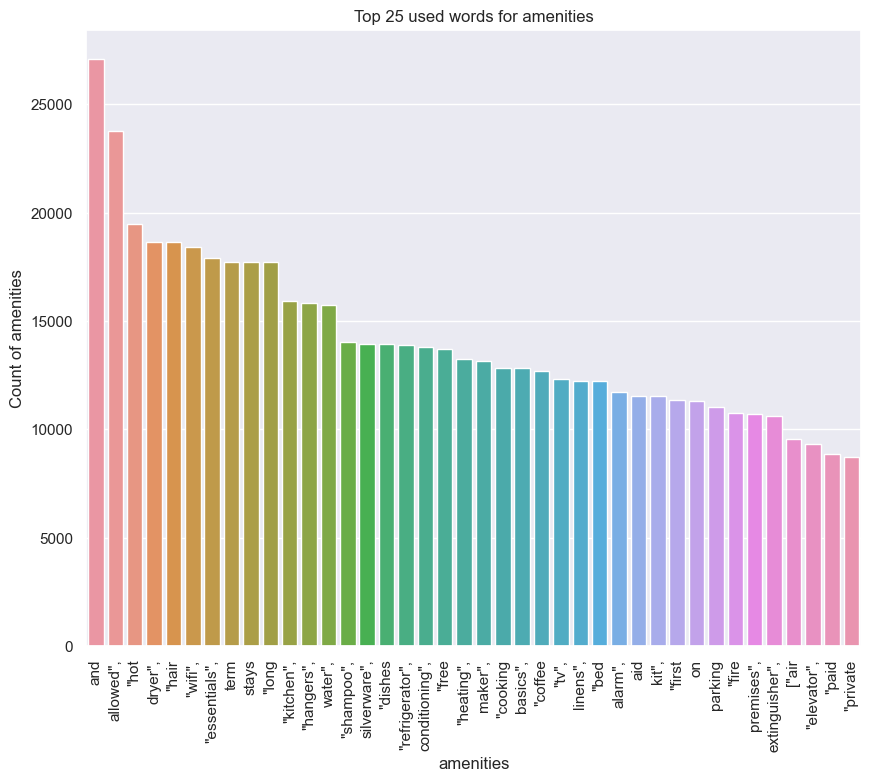

In [32]:
word_count_data = pd.DataFrame(top_25)
word_count_data.rename(columns={0:'amenities',1:'Counts'},inplace=True)
viz_count = sns.barplot(x='amenities',y='Counts', data = word_count_data)
viz_count.set_title('Top 25 used words for amenities')
viz_count.set_ylabel('Count of amenities')
viz_count.set_xlabel('amenities')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90)

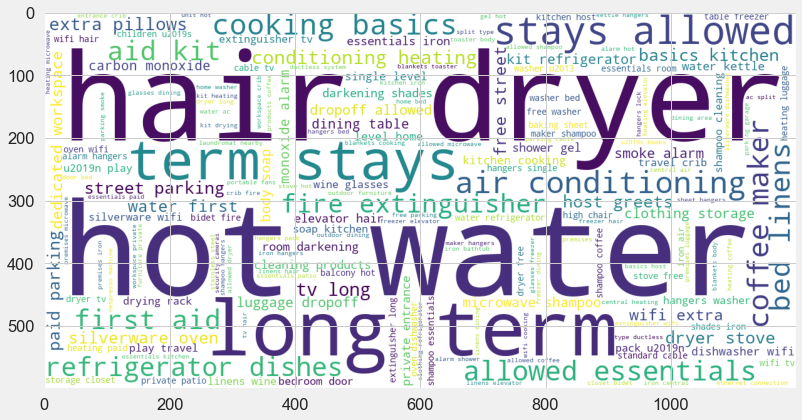

In [51]:
text = ' '.join(str(n).lower() for n in df.amenities)
plt.figure(figsize=(12,12))
cloud = WordCloud(width = 1200, height = 600,
                  background_color ='white',
                  min_font_size = 10)
cloud = plt.imshow(cloud.generate((text)))

In [33]:
df["amenities"]

0        ["Heating", "Shampoo", "Cleaning products", "Hot water kettle", "Hangers", "Lock on bedroom door...
1        ["First aid kit", "Heating", "Elevator", "Wifi", "Hair dryer", "Long term stays allowed", "Dryer...
2        ["Air conditioning", "Heating", "Lockbox", "Microwave", "Shampoo", "Coffee maker", "Hot water ke...
3        ["Air conditioning", "First aid kit", "Heating", "Fire extinguisher", "Wifi", "Hair dryer", "TV"...
4        ["Heating", "Paid parking off premises", "Luggage dropoff allowed", "Microwave", "Shampoo", "Cof...
                                                        ...                                                 
24776    ["Private entrance", "Hot water", "First aid kit", "Heating", "Fire extinguisher", "Wifi", "Hair...
24777    ["Hot water", "Refrigerator", "Heating", "Dishes and silverware", "Oven", "Hair dryer", "TV", "F...
24778    ["Private entrance", "Hot water", "Air conditioning", "Heating", "Wifi", "Hair dryer", "TV", "Br...
24780    ["Private 

To see how these features affect the price and score, we add them to the column to be able to insert them into the model later.

In [34]:
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [54]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Heating'), 'heating'] = 1
df.loc[df['amenities'].str.contains('Hot water'), 'hot water'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\ozden\AppData\Local\Temp\ipykernel_15532\488653525.py:24: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



In [35]:
cols_to_replace_nulls = df.iloc[:,22:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

In [36]:
df = df.dropna(axis=1, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20159 entries, 0 to 24781
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           20159 non-null  int64         
 1   host_since                   20159 non-null  datetime64[ns]
 2   host_id                      20159 non-null  int64         
 3   host_identity_verified       20159 non-null  object        
 4   host_is_superhost            20159 non-null  object        
 5   latitude                     20159 non-null  float64       
 6   longitude                    20159 non-null  float64       
 7   room_type                    20159 non-null  object        
 8   bedrooms                     20159 non-null  float64       
 9   beds                         20159 non-null  float64       
 10  amenities                    20159 non-null  object        
 11  minimum_nights               20159 non-nu

A house flyer priced at $50000 was breaking the model. We filter it


In [37]:
df = df.loc[df["price"] < 50000]
df

,id,host_since,host_id,host_identity_verified,host_is_superhost,latitude,longitude,room_type,bedrooms,beds,amenities,minimum_nights,neighbourhood_cleansed,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,17629440,2016-04-23,68534156,Host Identity Verified,Superhost,41.78984,12.60899,Private room,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""Hot water kettle"", ""Hangers"", ""Lock on bedroom door...",1,VII San Giovanni/Cinecittà,45.0,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,3.22
1,2737,2008-09-18,3047,Host Identity Not Verified,Not Superhost,41.87136,12.48215,Private room,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi"", ""Hair dryer"", ""Long term stays allowed"", ""Dryer...",7,VIII Appia Antica,50.0,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,0.07
2,103870,2011-04-26,535822,Host Identity Verified,Not Superhost,41.89711,12.50423,Entire home/apt,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Microwave"", ""Shampoo"", ""Coffee maker"", ""Hot water ke...",3,I Centro Storico,78.0,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,1.64
3,2903,2008-09-28,3280,Host Identity Not Verified,Not Superhost,41.88824,12.46953,Private room,1.0,2.0,"[""Air conditioning"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Wifi"", ""Hair dryer"", ""TV""...",1,I Centro Storico,164.0,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,0.33
4,104339,2011-04-28,543054,Host Identity Verified,Not Superhost,41.85585,12.48361,Entire home/apt,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Microwave"", ""Shampoo"", ""Cof...",2,VIII Appia Antica,80.0,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24776,22538683,2018-01-03,165551807,Host Identity Verified,Superhost,41.72610,12.61941,Entire home/apt,3.0,4.0,"[""Private entrance"", ""Hot water"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Wifi"", ""Hair...",3,IX Eur,96.0,20,4.85,5.00,5.00,4.95,4.85,4.70,4.75,0.38
24777,28042301,2018-08-26,211821938,Host Identity Verified,Not Superhost,41.64897,12.43349,Entire home/apt,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Heating"", ""Dishes and silverware"", ""Oven"", ""Hair dryer"", ""TV"", ""F...",2,X Ostia/Acilia,55.0,17,4.53,4.76,4.88,4.94,4.88,4.82,4.65,0.35
24778,41256298,2019-04-03,252978577,Host Identity Verified,Not Superhost,41.79978,12.30112,Entire home/apt,1.0,1.0,"[""Private entrance"", ""Hot water"", ""Air conditioning"", ""Heating"", ""Wifi"", ""Hair dryer"", ""TV"", ""Br...",1,X Ostia/Acilia,120.0,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.04
24780,42446790,2012-04-24,2214620,Host Identity Verified,Not Superhost,42.10042,12.38471,Private room,4.0,4.0,"[""Private entrance"", ""Hot water"", ""Air conditioning"", ""Heating"", ""Fire extinguisher"", ""Hair drye...",1,XV Cassia/Flaminia,50.0,3,4.33,4.33,4.67,4.67,5.00,4.33,4.67,0.12


Operations for editing column names


In [38]:
transformedDF = pd.get_dummies(df, columns=['room_type','host_is_superhost'])

In [39]:
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Hotel room': 'room_type_Hotel_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF =newTransformedDF.rename(columns={'host_is_superhost_Not Superhost': 'host_is_superhost_Not_Superhost'})

In [60]:
newTransformedDF

,id,host_since,host_id,host_identity_verified,latitude,longitude,bedrooms,beds,amenities,minimum_nights,neighbourhood_cleansed,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,check_in_24h,heating,hot water,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,host_is_superhost_Not_Superhost,host_is_superhost_Superhost
0,17629440,2016-04-23,68534156,Host Identity Verified,41.78984,12.60899,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""Hot water kettle"", ""Hangers"", ""Lock on bedroom door...",1,VII San Giovanni/Cinecittà,45.0,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,3.22,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1
1,2737,2008-09-18,3047,Host Identity Not Verified,41.87136,12.48215,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi"", ""Hair dryer"", ""Long term stays allowed"", ""Dryer...",7,VIII Appia Antica,50.0,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,0.07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
2,103870,2011-04-26,535822,Host Identity Verified,41.89711,12.50423,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Microwave"", ""Shampoo"", ""Coffee maker"", ""Hot water ke...",3,I Centro Storico,78.0,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,1.64,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
3,2903,2008-09-28,3280,Host Identity Not Verified,41.88824,12.46953,1.0,2.0,"[""Air conditioning"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Wifi"", ""Hair dryer"", ""TV""...",1,I Centro Storico,164.0,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,0.33,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
4,104339,2011-04-28,543054,Host Identity Verified,41.85585,12.48361,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Microwave"", ""Shampoo"", ""Cof...",2,VIII Appia Antica,80.0,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,0.05,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24776,22538683,2018-01-03,165551807,Host Identity Verified,41.72610,12.61941,3.0,4.0,"[""Private entrance"", ""Hot water"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Wifi"", ""Hair...",3,IX Eur,96.0,20,4.85,5.00,5.00,4.95,4.85,4.70,4.75,0.38,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
24777,28042301,2018-08-26,211821938,Host Identity Verified,41.64897,12.43349,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Heating"", ""Dishes and silverware"", ""Oven"", ""Hair dryer"", ""TV"", ""F...",2,X Ostia/Acilia,55.0,17,4.53,4.76,4.88,4.94,4.88,4.82,4.65,0.35,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
24778,41256298,2019-04-03,252978577,Host Identity Verified,41.79978,12.30112,1.0,1.0,"[""Private entrance"", ""Hot water"", ""Air conditioning"", ""Heating"", ""Wifi

## Model

## Linear Regression

We want to learn how amaneties affect price through linear regression


In [61]:
X1 = pd.DataFrame(newTransformedDF[["bedrooms", "breakfast", "tv", "white_goods", "gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room","room_type_Hotel_room","heating","hot water","number_of_reviews"]]) 
y1 = pd.DataFrame(newTransformedDF["price"])
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1), columns=list(X1.columns))

In [62]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1.values, test_size=0.2)

In [63]:
lg = LinearRegression()     
lg.fit(X_train1, y_train1)

LinearRegression()

In [64]:
print('Intercept of Regression \t: b = ', lg.intercept_)
print()
print(pd.DataFrame(list(zip(X_train1.columns, lg.coef_[0])), columns = ["Predictors", "Coefficients"]))

Intercept of Regression 	: b =  [149.90978265]

                   Predictors  Coefficients
0                    bedrooms  6.907244e+01
1                   breakfast -2.037227e+00
2                          tv  1.119158e+01
3                 white_goods -5.753669e+00
4                         gym  3.262724e+00
5       hot_tub_sauna_or_pool  5.432618e+00
6                    internet  5.688515e+00
7                pets_allowed  1.157513e+01
8                      secure  1.161935e+01
9                  accessible -2.210950e+10
10          number_of_reviews  4.130607e+12
11  room_type_Entire_home_apt -5.824424e+13
12     room_type_Private_room -5.620725e+13
13      room_type_Shared_room -7.674882e+12
14       room_type_Hotel_room -2.163550e+13
15                    heating  5.701836e+00
16                  hot water -6.727172e+00
17          number_of_reviews -4.130607e+12


In [65]:
trainPredictionLR1 = lg.predict(X_train1)
testPredictionLR1 = lg.predict(X_test1)

(0.0, 1250.0)

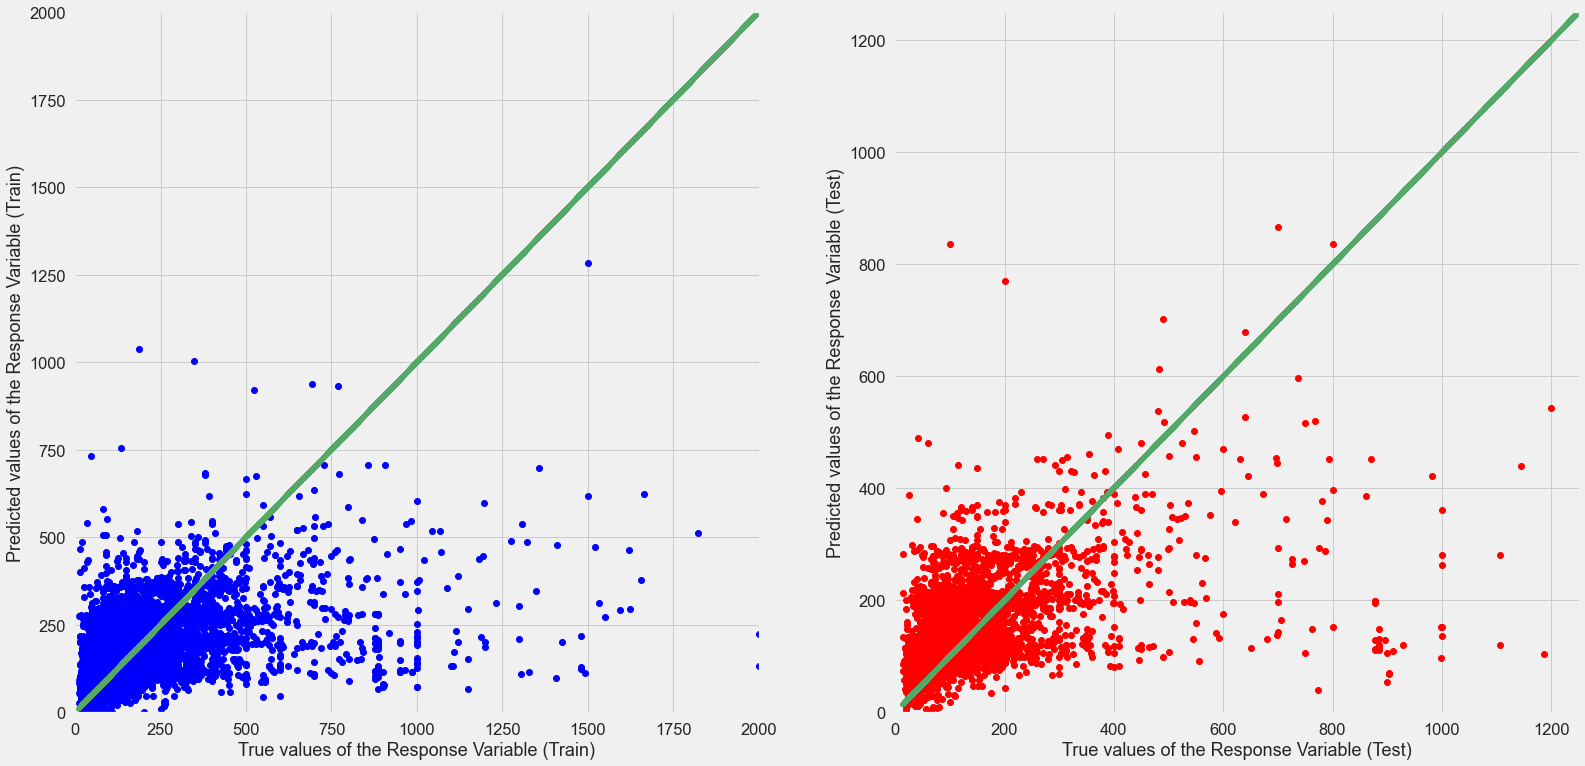

In [67]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
f, axes = plt.subplots(1,2, figsize=(24, 12))
axes[0].scatter(y_train1, trainPredictionLR1, color = "blue")
axes[0].plot(y_train1, y_train1, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_xlim(0, 2000)
axes[0].set_ylim(0, 2000)

axes[1].scatter(y_test1, testPredictionLR1, color = "red")
axes[1].plot(y_test1, y_test1, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlim(0, 1250)
axes[1].set_ylim(0, 1250)

 Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

## Decision Tree

We use Grid Search to give the most accurate parameters for the decision tree.


In [68]:
parameters_for_testing = {
'colsample_bytree':[0.3,0.5],
'learning_rate':[0.1,0.5],
'alpha': [10,12],
'max_depth':[3,5],
'n_estimators':[2000],  
}

xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     gamma=0, colsample_bytree=0.8)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(np.array(X_train1),np.array(y_train1))

print(gsearch1.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)


We create our model in line with these parameters.


In [69]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 12, n_estimators = 2000)

xgb_reg.fit(np.array(X_train1),np.array(y_train1))
trainPredictin_xgb_reg = xgb_reg.predict(X_train1)
testPredictin_xgb_reg = xgb_reg.predict(X_test1)

[19:32:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


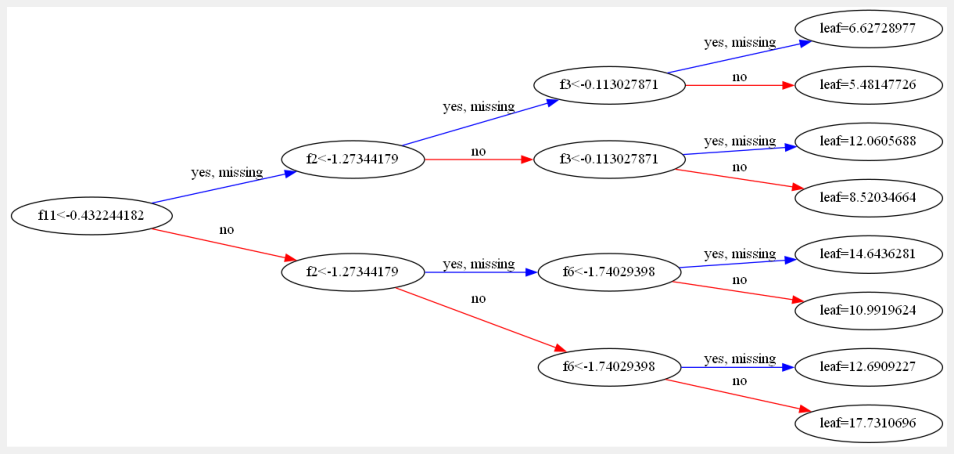

In [70]:
xgb.plot_tree(xgb_reg, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 20)

We show you which feature affects the price and to what extent.


In [71]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train1.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
accessible,0.000000
room_type_Shared_room,0.005532
room_type_Hotel_room,0.011392
internet,0.021487
hot_tub_sauna_or_pool,0.024414
breakfast,0.026183
number_of_reviews,0.029270
gym,0.033768
tv,0.034278
number_of_reviews,0.039890


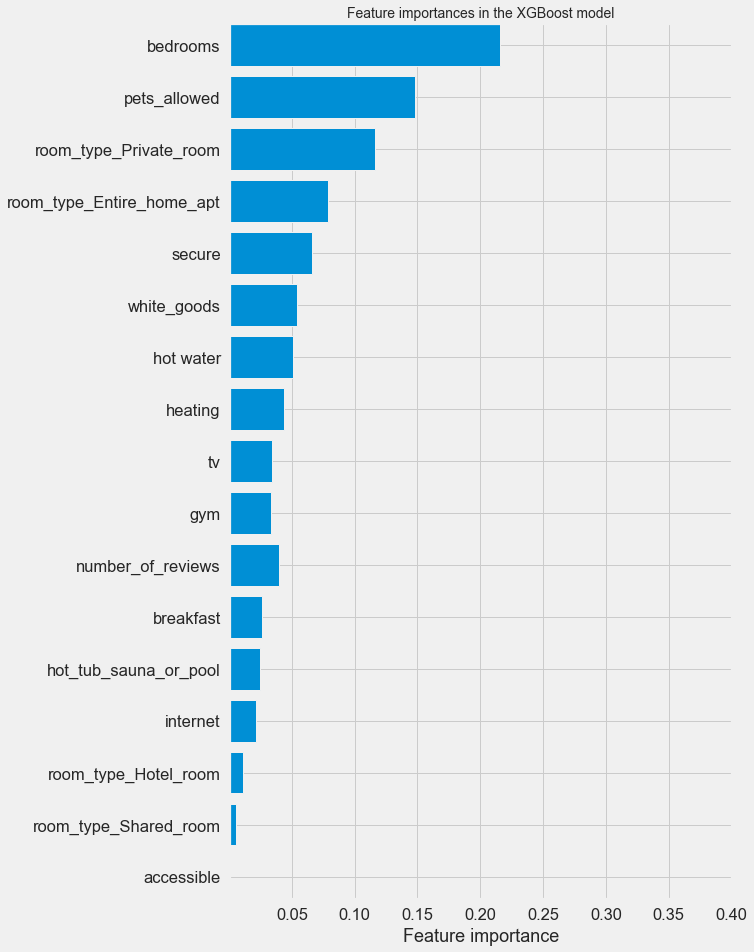

In [72]:
plt.figure(figsize=(8,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.001)
plt.xlim(0.001, 0.4)
plt.show()

It can be understood from this chart that the number of bedrooms, the acceptance of pets, the entire room or the private room seem to be the factors that increase the price the most.

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

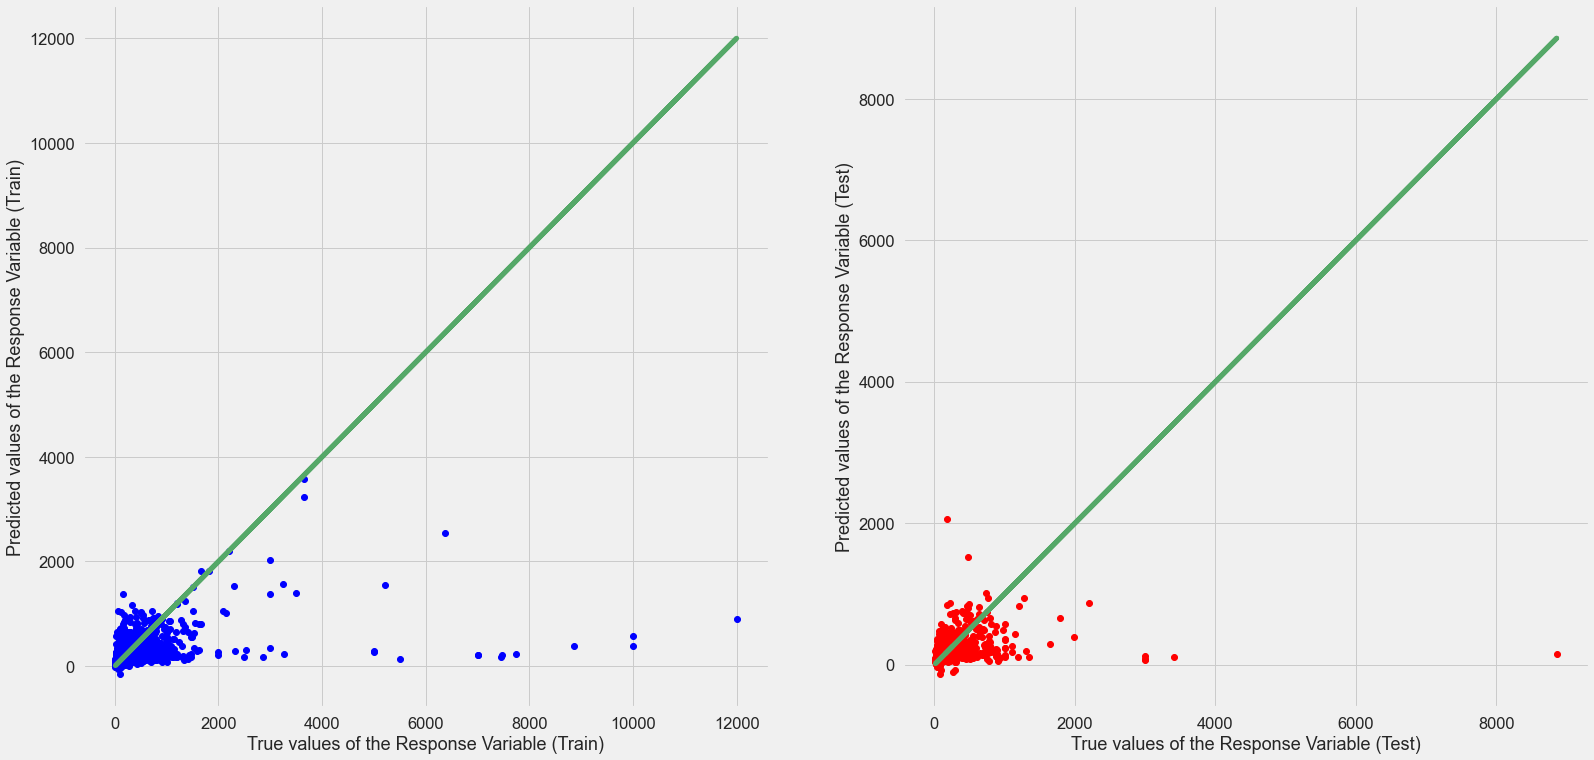

In [73]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train1, trainPredictin_xgb_reg, color = "blue")
axes[0].plot(y_train1, y_train1, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test1, testPredictin_xgb_reg, color = "red")
axes[1].plot(y_test1, y_test1, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Points that lie on or near the diagonal line means that the values predicted by the XGBoost Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

We make the model we made for the price, this time for the Score.


In [74]:
X = pd.DataFrame(newTransformedDF[["bedrooms", "breakfast", "tv", "white_goods", "gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room","room_type_Hotel_room","heating","hot water","number_of_reviews"]]) 
y = pd.DataFrame(newTransformedDF["review_scores_rating"])
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2)

In [76]:
parameters_for_testing = {
'colsample_bytree':[0.3,0.5],
'learning_rate':[0.1,0.5],
'alpha': [10,12],
'max_depth':[3,5],
'n_estimators':[2000],  
}

xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     gamma=0, colsample_bytree=0.8)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(np.array(X_train),np.array(y_train))

print(gsearch1.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
XGBRegressor(alpha=12, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)


In [77]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 12, n_estimators = 2000)

xgb_reg.fit(np.array(X_train),np.array(y_train))
trainPredictin_xgb_reg = xgb_reg.predict(X_train)
testPredictin_xgb_reg = xgb_reg.predict(X_test)

[19:33:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


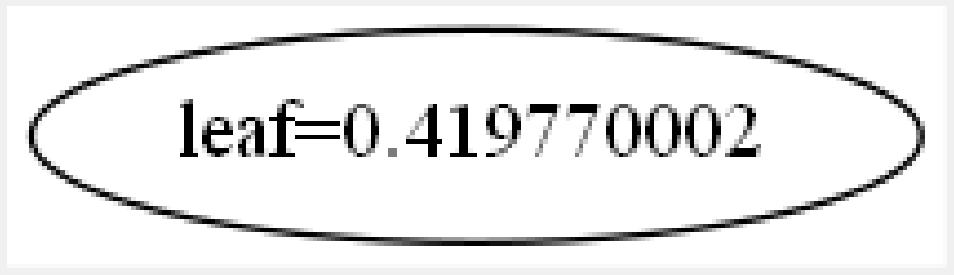

In [78]:
xgb.plot_tree(xgb_reg, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 20)

The amaneties that affect the score the most


In [79]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
accessible,0.000000
pets_allowed,0.001845
hot_tub_sauna_or_pool,0.004402
gym,0.008946
bedrooms,0.024825
room_type_Private_room,0.026448
room_type_Hotel_room,0.028146
secure,0.035778
internet,0.038871
room_type_Entire_home_apt,0.043697


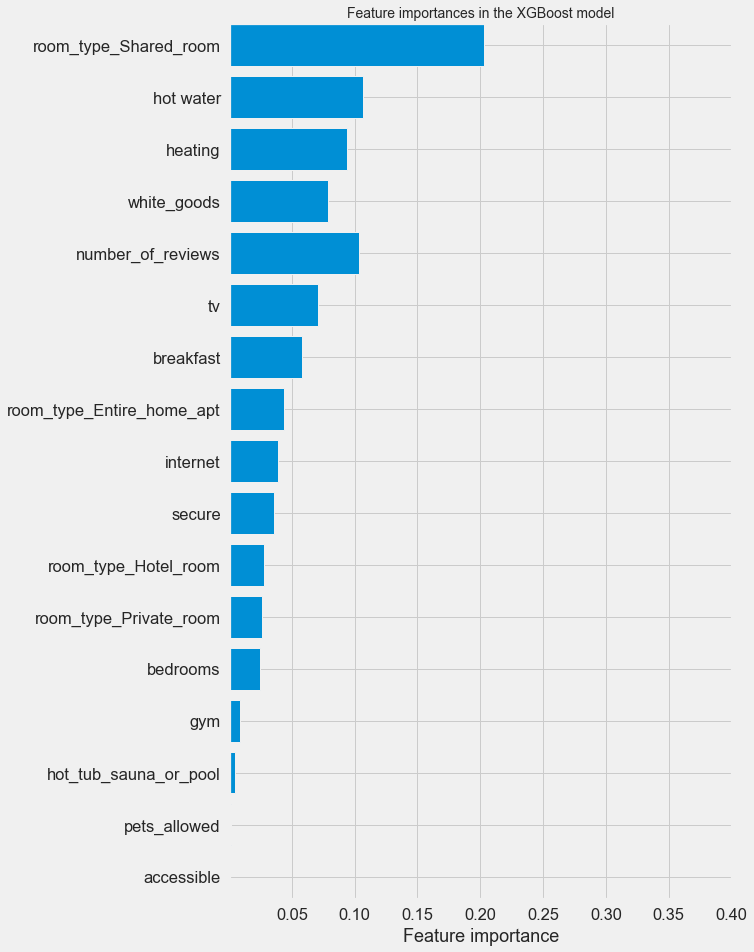

In [80]:
plt.figure(figsize=(8,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.001)
plt.xlim(0.001, 0.4)
plt.show()

In this model, our aim is the factors that most affect the score given to the house by the user.When we examine the graph, having a common room, having hot water and heating are the possibilities that most affect the increase in the score.What interests us here is that the shared room gets the highest value. Because the shared room was seen as the house type with the least advert according to the graphics we obtained above. If we interpret this, the person you share the shared room with is very nice to you and if you get a good deal, they may have given more points.

Logistic regression


In [82]:
df4 = newTransformedDF
df4['review_scores_rating'].mean()

4.698704236531432

## Logistic Regression

We classify for this mean value logistic regression analysis.


In [84]:
df4['review_scores_rating'] = df4['review_scores_rating'].apply(lambda x: 1 if x > 4.7 else 0)
Counter(df4['review_scores_rating'])

Counter({1: 12835, 0: 7323})

In [85]:
X2 = pd.DataFrame(df4[["bedrooms", "breakfast", "tv", "white_goods", "gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room","room_type_Hotel_room","heating","hot water","number_of_reviews"]]) 
y2 = pd.DataFrame(df4["review_scores_rating"])

In [86]:
model_logistic = LogisticRegression()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
model_logistic.fit(X_train2, y_train2)

c:\Users\ozden\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ozden\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [87]:
weights1 = model_logistic.coef_
print(weights1)

[[-0.01024856  0.42717951  0.21659668  0.33447889  0.10869392  0.01097773
  -0.11172196  0.34924236  0.56191697  0.          0.00086046  0.24837927
   0.12086189 -0.18239394 -0.1763329  -0.298966    0.16613954  0.00086046]]


The larger the values ​​here, the more it affects the score.


First, we looked at the average of the scores given by the users without using logistic regression. As a result, we have classified hosts with scores better than 4.7 as good hosts. Then, after we put our data into the model, logistics gave us the most important factors as weight. If we interpret these values ​​according to the indices of the amenities. Pets allowed, secure and breakfast seem to be the most important factors to have a good score.

## As a result, if we create an analysis according to all graphics and models:

1.)Generally,houses with 1 or 2 beds and 1or 2 bedrooms are more preferred.


2.)The response rate of the host to the messages is an important factor in the high score. Replying to your users can be good for your score.


3.) 56.2% of the houses in Rome are in the I Centro Storico area, if you have a house in this area, you have more luck.

3a.)The houses in I Centro Storico are arranged to be rented for a minimum of 2 nights on average, and the houses here are usually entire rooms.

3b.)Houses in I Centro Storico average between $100-$200 per night.


4.)We observed that the increase in the possibilities of the house increased the price of the house.


5.)According to the model we created in Decision Tree, the factors that most affect the increase in the price of the house are: bedrooms,pet allowed,private room,entire room,secured.


6.)According to the model we created in Decision Tree, the factors that most affect the score given by the users are: shared room, hot water, heating, white goods, number of reviews and tv.


## Task Distribution


In short, we gathered together and determined the project and created the proposal. Afterwards, Ali and Özden did the analysis and cleaning of the data together. After that, Utku created the machine learning models, and Ali and Özden helped where help was needed. Finally, we once again explained the things we did together and reported the results we achieved. We managed to proceed in almost the same way as the distribution of tasks we gave in the proposal.